In [1]:
import pandas as pd

In [43]:
bigmac = pd.read_csv("bigmac.csv", parse_dates=['Date'])
bigmac.head(3)

,Date,Country,Price in US Dollars
0,2016-01-01,Argentina,2.39
1,2016-01-01,Australia,3.74
2,2016-01-01,Brazil,3.35


### MultiIndex order matters

In [44]:
bigmac.set_index(keys = ['Date', 'Country']).head()

Price in US Dollars
Date       Country                       
2016-01-01 Argentina                 2.39
           Australia                 3.74
           Brazil                    3.35
           Britain                   4.22
           Canada                    4.14

In [45]:
bigmac.set_index(keys = ['Country', 'Date']).head()

,,Price in US Dollars
Country,Date,
Argentina,2016-01-01,2.39
Australia,2016-01-01,3.74
Brazil,2016-01-01,3.35
Britain,2016-01-01,4.22
Canada,2016-01-01,4.14


In [48]:
#Let's change the original DF
bigmac = bigmac.set_index(keys = ['Date', 'Country'])

In [50]:
bigmac = bigmac.sort_index()
bigmac.head(3)

Price in US Dollars
Date       Country                       
2010-01-01 Argentina                 1.84
           Australia                 3.98
           Brazil                    4.76

In [56]:
bigmac.index

MultiIndex(levels=[[2010-01-01 00:00:00, 2010-07-01 00:00:00, 2011-07-01 00:00:00, 2012-01-01 00:00:00, 2012-07-01 00:00:00, 2013-01-01 00:00:00, 2013-07-01 00:00:00, 2014-01-01 00:00:00, 2014-07-01 00:00:00, 2015-01-01 00:00:00, 2015-07-01 00:00:00, 2016-01-01 00:00:00], [u'Argentina', u'Australia', u'Austria', u'Belgium', u'Brazil', u'Britain', u'Canada', u'Chile', u'China', u'Colombia', u'Costa Rica', u'Czech Republic', u'Denmark', u'Egypt', u'Estonia', u'Euro area', u'Finland', u'France', u'Germany', u'Greece', u'Hong Kong', u'Hungary', u'India', u'Indonesia', u'Ireland', u'Israel', u'Italy', u'Japan', u'Latvia', u'Lithuania', u'Malaysia', u'Mexico', u'Netherlands', u'New Zealand', u'Norway', u'Pakistan', u'Peru', u'Philippines', u'Poland', u'Portugal', u'Russia', u'Saudi Arabia', u'Singapore', u'South Africa', u'South Korea', u'Spain', u'Sri Lanka', u'Sweden', u'Switzerland', u'Taiwan', u'Thailand', u'Turkey', u'UAE', u'Ukraine', u'United States', u'Uruguay', u'Venezuela', u'Vietn

### Each Index Is Given a Name
- each index is stored as a python tuple
- each index is also given an integer index value

In [58]:
bigmac.index.names

FrozenList([u'Date', u'Country'])

In [62]:
bigmac.index[0]

(Timestamp('2010-01-01 00:00:00'), 'Argentina')

## Extract Index Values with the <code> get_level_values</code> method
- we can use both "name" and "index" on the level to extract corresponding level values.

In [66]:
bigmac = pd.read_csv("bigmac.csv", parse_dates=['Date'], index_col=['Date', 'Country']).sort_index()
bigmac.head(3)

Price in US Dollars
Date       Country                       
2010-01-01 Argentina                 1.84
           Australia                 3.98
           Brazil                    4.76

In [68]:
#Get value of "Date" level
bigmac.index.get_level_values("Date")
bigmac.index.get_level_values(0)

DatetimeIndex(['2010-01-01', '2010-01-01', '2010-01-01', '2010-01-01',
               '2010-01-01', '2010-01-01', '2010-01-01', '2010-01-01',
               '2010-01-01', '2010-01-01',
               ...
               '2016-01-01', '2016-01-01', '2016-01-01', '2016-01-01',
               '2016-01-01', '2016-01-01', '2016-01-01', '2016-01-01',
               '2016-01-01', '2016-01-01'],
              dtype='datetime64[ns]', name=u'Date', length=652, freq=None)

In [70]:
#Get value of "Country" level
bigmac.index.get_level_values("Country")
bigmac.index.get_level_values(1)

Index([u'Argentina', u'Australia', u'Brazil', u'Britain', u'Canada', u'Chile',
       u'China', u'Colombia', u'Costa Rica', u'Czech Republic',
       ...
       u'Switzerland', u'Taiwan', u'Thailand', u'Turkey', u'UAE', u'Ukraine',
       u'United States', u'Uruguay', u'Venezuela', u'Vietnam'],
      dtype='object', name=u'Country', length=652)

## Change Index  Level Name with the <code> set_names </code> Method

In [96]:
bigmac = pd.read_csv("bigmac.csv", parse_dates=['Date'], index_col=['Date', 'Country']).sort_index()
bigmac.head(3)

Price in US Dollars
Date       Country                       
2010-01-01 Argentina                 1.84
           Australia                 3.98
           Brazil                    4.76

In [97]:
bigmac.index.set_names(names = ["Day", "Location"], inplace=True)

In [98]:
bigmac.head()

Price in US Dollars
Day        Location                      
2010-01-01 Argentina                 1.84
           Australia                 3.98
           Brazil                    4.76
           Britain                   3.67
           Canada                    3.97

In [99]:
#Let us change the names by targeting the respective index levels. 
#Means what if we want to change on particular level
bigmac.index.set_names(names = ['Country', 'Date'], level=['Location', 'Day'], inplace=True)

#bigmac.index.set_names(names = ['Country', 'Date'], level=[1, 0], inplace=True)

In [100]:
bigmac.head()

Price in US Dollars
Date       Country                       
2010-01-01 Argentina                 1.84
           Australia                 3.98
           Brazil                    4.76
           Britain                   3.67
           Canada                    3.97

## Sort index labels differently using <code> sort_index </code> method
- say we want to sort "Date" in ascending order and "Country" in descending order.
- say you want to sort only using "Date" index level.

In [109]:
bigmac = pd.read_csv("bigmac.csv", parse_dates=['Date'], index_col=['Date', 'Country'])
bigmac.head(3)

Price in US Dollars
Date       Country                       
2016-01-01 Argentina                 2.39
           Australia                 3.74
           Brazil                    3.35

In [110]:
bigmac.sort_index(level=["Date", "Country"], ascending=[True, False]).head(3)

Price in US Dollars
Date       Country                           
2010-01-01 Uruguay                       3.32
           United States                 3.58
           Ukraine                       1.83

In [114]:
bigmac.sort_index(level="Country", ascending=False).head(10)

,,Price in US Dollars
Date,Country,
2016-01-01,Vietnam,2.67
2015-07-01,Vietnam,2.75
2015-01-01,Vietnam,2.81
2014-07-01,Vietnam,2.83
2014-01-01,Vietnam,2.84
2016-01-01,Venezuela,0.66
2015-07-01,Venezuela,0.67
2015-01-01,Venezuela,2.53
2014-07-01,Venezuela,6.82


## Extract rows from <code> MultiIndex DataFrame </code>

In [124]:
bigmac = pd.read_csv("bigmac.csv", parse_dates=['Date'], index_col=['Date', 'Country']).sort_index()
bigmac.head(3)

Price in US Dollars
Date       Country                       
2010-01-01 Argentina                 1.84
           Australia                 3.98
           Brazil                    4.76

#### AMBIGUITY
- .loc will work if you provide the comma separated values of index.
- Ambiguity arises, since we know that second argument should be column according to python standards.
- Therefore it causes a confusion.
- Best method is to provide the index values in tuple.
- iloc works the same way, as it works for simple index.

In [129]:
bigmac.loc[("2010-01-01", "Australia")]

Price in US Dollars    3.98
Name: (2010-01-01 00:00:00, Australia), dtype: float64

In [131]:
#REMEMBER PYTHON:- ("2010-01-01") is not a tuple, where ("2010-01-01", ) is. So outputs will be different

bigmac.loc[("2010-01-01")].head()

Price in US Dollars
Date       Country                       
2010-01-01 Argentina                 1.84
           Australia                 3.98
           Brazil                    4.76
           Britain                   3.67
           Canada                    3.97

In [132]:
bigmac.loc[("2010-01-01",)].head()

,Price in US Dollars
Country,
Argentina,1.84
Australia,3.98
Brazil,4.76
Britain,3.67
Canada,3.97


In [134]:
bigmac.loc[("2010-01-01", "Canada"), "Price in US Dollars"]

Date        Country
2010-01-01  Canada     3.97
Name: Price in US Dollars, dtype: float64

In [136]:
bigmac.iloc[[0, 12, 120]]

Price in US Dollars
Date       Country                       
2010-01-01 Argentina                 1.84
           Euro area                 4.84
2011-07-01 Norway                    8.31

## Create a MultiIndex column using <code> Transpose </code> method.
- Accessing the elements will be same using .loc

In [16]:
bigmac = pd.read_csv("bigmac.csv", parse_dates=['Date'], index_col=['Date', 'Country'])
bigmac.sort_index(inplace=True)
bigmac.head(3)

Price in US Dollars
Date       Country                       
2010-01-01 Argentina                 1.84
           Australia                 3.98
           Brazil                    4.76

In [17]:
bigmac = bigmac.transpose()
bigmac.head()

Date                2010-01-01                                              \
Country              Argentina Australia Brazil Britain Canada Chile China   
Price in US Dollars       1.84      3.98   4.76    3.67   3.97  3.18  1.83   

Date                                                     ...    2016-01-01  \
Country             Colombia Costa Rica Czech Republic   ...   Switzerland   
Price in US Dollars     3.91       3.52           3.71   ...          6.44   

Date                                                                    \
Country             Taiwan Thailand Turkey   UAE Ukraine United States   
Price in US Dollars   2.08     3.09   3.41  3.54    1.54          4.93   

Date                                           
Country             Uruguay Venezuela Vietnam  
Price in US Dollars    3.74      0.66    2.67  

[1 rows x 652 columns]

In [21]:
#Access element using .loc
bigmac.loc[("Price in US Dollars")].head(10) #This will return a MultiIndex Column Series

Date        Country       
2010-01-01  Argentina         1.84
            Australia         3.98
            Brazil            4.76
            Britain           3.67
            Canada            3.97
            Chile             3.18
            China             1.83
            Colombia          3.91
            Costa Rica        3.52
            Czech Republic    3.71
Name: Price in US Dollars, dtype: float64

In [25]:
bigmac.loc[("Price in US Dollars",), ("2010-01-01",)] #This will return values for only Jan-2010 Date Column Index

Date                2010-01-01                                              \
Country              Argentina Australia Brazil Britain Canada Chile China   
Price in US Dollars       1.84      3.98   4.76    3.67   3.97  3.18  1.83   

Date                                                     ...              \
Country             Colombia Costa Rica Czech Republic   ...   Sri Lanka   
Price in US Dollars     3.91       3.52           3.71   ...        1.83   

Date                                                                         \
Country             Sweden Switzerland Taiwan Thailand Turkey   UAE Ukraine   
Price in US Dollars   5.51         6.3   2.36     2.11   3.83  2.99    1.83   

Date                                       
Country             United States Uruguay  
Price in US Dollars          3.58    3.32  

[1 rows x 43 columns]

In [29]:
#This will return the DF with 2010 Jan column and for country China
bigmac.loc[("Price in US Dollars",), ("2010-01-01", "China")] 

Date,2010-01-01
Country,China
Price in US Dollars,1.83


In [40]:
#Let's do some cool slicing on columns
bigmac.loc[("Price in US Dollars",), ("2010-01-01", "China") : ("2010-01-01","Ukraine")] 

Date                2010-01-01                                             \
Country                  China Colombia Costa Rica Czech Republic Denmark   
Price in US Dollars       1.83     3.91       3.52           3.71    5.99   

Date                                                              ...    \
Country             Egypt Euro area Hong Kong Hungary Indonesia   ...     
Price in US Dollars  2.38      4.84      1.91    3.86      2.24   ...     

Date                                                                       \
Country             South Africa South Korea Sri Lanka Sweden Switzerland   
Price in US Dollars         2.46        2.98      1.83   5.51         6.3   

Date                                                      
Country             Taiwan Thailand Turkey   UAE Ukraine  
Price in US Dollars   2.36     2.11   3.83  2.99    1.83  

[1 rows x 35 columns]

## The <code> swaplevel </code> method
- If there are only two levels in multiindex, then you need not provide any arguments to method.
- Otherwise given the names of two levels, or index values to swap them.

In [41]:
bigmac = pd.read_csv("bigmac.csv", parse_dates=['Date'], index_col=['Date', 'Country'])
bigmac.sort_index(inplace=True)
bigmac.head(3)

Price in US Dollars
Date       Country                       
2010-01-01 Argentina                 1.84
           Australia                 3.98
           Brazil                    4.76

In [47]:
#All the below will do swap both the level values of DF
bigmac.swaplevel()

bigmac.swaplevel("Date", "Country")
bigmac.swaplevel("Country", "Date")
bigmac.swaplevel(0,1)
bigmac.swaplevel(1,0).head(3)

,,Price in US Dollars
Country,Date,
Argentina,2010-01-01,1.84
Australia,2010-01-01,3.98
Brazil,2010-01-01,4.76


## The <code> .stack </code> Method

In [83]:
world_stats = pd.read_csv("worldstats.csv", index_col=["country", "year"])
world_stats.sort_index(inplace=True)
world_stats.head(3)

Population           GDP
country    year                           
Arab World 2015  392022276.0  2.530102e+12
           2014  384222592.0  2.873600e+12
           2013  376504253.0  2.846994e+12

In [84]:
world_stats = world_stats.stack()

In [87]:
world_stats.head()

country     year            
Arab World  2015  Population    3.920223e+08
                  GDP           2.530102e+12
            2014  Population    3.842226e+08
                  GDP           2.873600e+12
            2013  Population    3.765043e+08
dtype: float64

## The <code> .unstack </code> method
- this method does the reverse of .stack() method by moving the most inner level to column
- this method can be chained together to perform multiple unstacking.
- if multiple unstacking is perfomed, then the column becomes MultiIndex type.
- we can also provide the level argument using which we can specify which index to unstack.
- the level argument can be a single level index/name, or list of level indexes/names/
- fill the NaN values coming due to unstacking by some other value.

In [71]:
world_stats = pd.read_csv("worldstats.csv", index_col=["country", "year"])
world_stats.sort_index(inplace=True)
world_stats.head(3)

Population           GDP
country     year                          
Afghanistan 1960   8994793.0  5.377778e+08
            1961   9164945.0  5.488889e+08
            1962   9343772.0  5.466667e+08

In [72]:
world_stats = world_stats.stack()
world_stats.head()

country      year            
Afghanistan  1960  Population    8.994793e+06
                   GDP           5.377778e+08
             1961  Population    9.164945e+06
                   GDP           5.488889e+08
             1962  Population    9.343772e+06
dtype: float64

In [73]:
world_stats.unstack().head()

Population           GDP
country     year                          
Afghanistan 1960   8994793.0  5.377778e+08
            1961   9164945.0  5.488889e+08
            1962   9343772.0  5.466667e+08
            1963   9531555.0  7.511112e+08
            1964   9728645.0  8.000000e+08

In [74]:
#Chaining of unstack methods, this will create a MultiIndex column
world_stats.unstack().unstack().head()

Population                                                  \
year               1960        1961        1962        1963        1964   
country                                                                   
Afghanistan   8994793.0   9164945.0   9343772.0   9531555.0   9728645.0   
Albania             NaN         NaN         NaN         NaN         NaN   
Algeria      11124892.0  11404859.0  11690152.0  11985130.0  12295973.0   
Andorra             NaN         NaN         NaN         NaN         NaN   
Angola              NaN         NaN         NaN         NaN         NaN   

                                                                         \
year               1965        1966        1967        1968        1969   
country                                                                   
Afghanistan   9935358.0  10148841.0  10368600.0  10599790.0  10849510.0   
Albania             NaN         NaN         NaN         NaN         NaN   
Algeria      12626953.0  12980269.0  13354197.0  13744383.0  14144437.0   
Andorra             NaN         NaN         NaN         NaN         NaN   
Angola              NaN         NaN         NaN         NaN         NaN   

                 ...                GDP                              \
year             ...               2006          2007          2008   
country          ...                                                  
Afghanistan      ...       7.057598e+09  9.843842e+09  1.019053e+10   
Albania          ...       8.992642e+09  1.070101e+10  1.288135e+10   
Algeria          ...       1.170273e+11  1.349771e+11  1.710007e+11   
Andorra          ...       3.536452e+09  4.010785e+09  4.001349e+09   
Angola           ...       4.178948e+10  6.044892e+10  8.417803e+10   

                                                                     \
year                 2009          2010          2011          2012   
country                                                               
Afghanistan  1.248694e+10  1.593680e+10  1.793024e+10  2.053654e+10   
Albania      1.204421e+10  1.192695e+10  1.289087e+10  1.231978e+10   
Algeria      1.372110e+11  1.612073e+11  2.000131e+11  2.090474e+11   
Andorra      3.649863e+09  3.346317e+09  3.427236e+09  3.146178e+09   
Angola       7.549238e+10  8.247091e+10  1.041159e+11  1.153984e+11   

                                                       
year                 2013          2014          2015  
country                                                
Afghanistan  2.004633e+10  2.005019e+10  1.919944e+10  
Albania      1.278103e+10  1.327796e+10  1.145560e+10  
Algeria      2.097035e+11  2.135185e+11  1.668386e+11  
Andorra      3.249101e+09           NaN           NaN  
Angola       1.249121e+11  1.267751e+11  1.026431e+11  

[5 rows x 112 columns]

In [75]:
#Unstacking a particular index, below will unstack "year" index level.
world_stats.unstack(level=1).head()
world_stats.unstack(level="year").head()

year                            1960          1961          1962  \
country                                                            
Afghanistan Population  8.994793e+06  9.164945e+06  9.343772e+06   
            GDP         5.377778e+08  5.488889e+08  5.466667e+08   
Albania     Population           NaN           NaN           NaN   
            GDP                  NaN           NaN           NaN   
Algeria     Population  1.112489e+07  1.140486e+07  1.169015e+07   

year                            1963          1964          1965  \
country                                                            
Afghanistan Population  9.531555e+06  9.728645e+06  9.935358e+06   
            GDP         7.511112e+08  8.000000e+08  1.006667e+09   
Albania     Population           NaN           NaN           NaN   
            GDP                  NaN           NaN           NaN   
Algeria     Population  1.198513e+07  1.229597e+07  1.262695e+07   

year                            1966          1967          1968  \
country                                                            
Afghanistan Population  1.014884e+07  1.036860e+07  1.059979e+07   
            GDP         1.400000e+09  1.673333e+09  1.373333e+09   
Albania     Population           NaN           NaN           NaN   
            GDP                  NaN           NaN           NaN   
Algeria     Population  1.298027e+07  1.335420e+07  1.374438e+07   

year                            1969      ...               2006  \
country                                   ...                      
Afghanistan Population  1.084951e+07      ...       2.518362e+07   
            GDP         1.408889e+09      ...       7.057598e+09   
Albania     Population           NaN      ...       2.992547e+06   
            GDP                  NaN      ...       8.992642e+09   
Algeria     Population  1.414444e+07      ...       3.374933e+07   

year                            2007          2008          2009  \
country                                                            
Afghanistan Population  2.587754e+07  2.652874e+07  2.720729e+07   
            GDP         9.843842e+09  1.019053e+10  1.248694e+10   
Albania     Population  2.970017e+06  2.947314e+06  2.927519e+06   
            GDP         1.070101e+10  1.288135e+10  1.204421e+10   
Algeria     Population  3.426197e+07  3.481106e+07  3.540179e+07   

year                            2010          2011          2012  \
country                                                            
Afghanistan Population  2.796221e+07  2.880917e+07  2.972680e+07   
            GDP         1.593680e+10  1.793024e+10  2.053654e+10   
Albania     Population  2.913021e+06  2.904780e+06  2.900247e+06   
            GDP         1.192695e+10  1.289087e+10  1.231978e+10   
Algeria     Population  3.603616e+07  3.671713e+07  3.743943e+07   

year                            2013          2014          2015  
country                                                           
Afghanistan Population  3.068250e+07  3.162751e+07  3.252656e+07  
            GDP         2.004633e+10  2.005019e+10  1.919944e+10  
Albania     Population  2.896652e+06  2.893654e+06  2.889167e+06  
            GDP         1.278103e+10  1.327796e+10  1.145560e+10  
Algeria     Population  3.818614e+07  3.893433e+07  3.966652e+07  

[5 rows x 56 columns]

In [128]:
#Unstacking a multiple indexes
world_stats.unstack(level=[0,1]).head()
res = world_stats.unstack(level=["country", "year"]).loc[("Population"), (["India", "Brazil", "China"])]
res.head()

country  year
Brazil   1960    72493585.0
         1961    74706888.0
         1962    77007549.0
         1963    79368453.0
         1964    81751802.0
Name: Population, dtype: float64

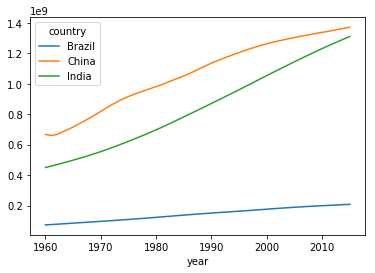

In [129]:
res.unstack().transpose().plot()

In [66]:
#Order of unstacking matters
world_stats.unstack(level=[1,0]).head()
world_stats.unstack(level=["year", "country"]).loc["Population", (1960, "India")]

449661874.0

In [132]:
#Filling the NaN values
world_stats.unstack(level=0,fill_value=0)

country           Afghanistan       Albania       Algeria       Andorra  \
year                                                                      
1960 Population  8.994793e+06  0.000000e+00  1.112489e+07  0.000000e+00   
     GDP         5.377778e+08  0.000000e+00  2.723638e+09  0.000000e+00   
1961 Population  9.164945e+06  0.000000e+00  1.140486e+07  0.000000e+00   
     GDP         5.488889e+08  0.000000e+00  2.434767e+09  0.000000e+00   
1962 Population  9.343772e+06  0.000000e+00  1.169015e+07  0.000000e+00   
     GDP         5.466667e+08  0.000000e+00  2.001461e+09  0.000000e+00   
1963 Population  9.531555e+06  0.000000e+00  1.198513e+07  0.000000e+00   
     GDP         7.511112e+08  0.000000e+00  2.703004e+09  0.000000e+00   
1964 Population  9.728645e+06  0.000000e+00  1.229597e+07  0.000000e+00   
     GDP         8.000000e+08  0.000000e+00  2.909340e+09  0.000000e+00   
1965 Population  9.935358e+06  0.000000e+00  1.262695e+07  0.000000e+00   
     GDP         1.006667e+09  0.000000e+00  3.136284e+09  0.000000e+00   
1966 Population  1.014884e+07  0.000000e+00  1.298027e+07  0.000000e+00   
     GDP         1.400000e+09  0.000000e+00  3.039859e+09  0.000000e+00   
1967 Population  1.036860e+07  0.000000e+00  1.335420e+07  0.000000e+00   
     GDP         1.673333e+09  0.000000e+00  3.370870e+09  0.000000e+00   
1968 Population  1.059979e+07  0.000000e+00  1.374438e+07  0.000000e+00   
     GDP         1.373333e+09  0.000000e+00  3.852147e+09  0.000000e+00   
1969 Population  1.084951e+07  0.000000e+00  1.414444e+07  0.000000e+00   
     GDP         1.408889e+09  0.000000e+00  4.257253e+09  0.000000e+00   
1970 Population  1.112110e+07  0.000000e+00  1.455003e+07  2.427900e+04   
     GDP         1.748887e+09  0.000000e+00  4.863488e+09  7.861762e+07   
1971 Population  1.141282e+07  0.000000e+00  1.496011e+07  2.556000e+04   
     GDP         1.831109e+09  0.000000e+00  5.077222e+09  8.940659e+07   
1972 Population  1.171690e+07  0.000000e+00  1.537710e+07  2.689200e+04   
     GDP         1.595555e+09  0.000000e+00  6.761786e+09  1.134144e+08   
1973 Population  1.202251e+07  0.000000e+00  1.580443e+07  2.823100e+04   
     GDP         1.733333e+09  0.000000e+00  8.715106e+09  1.508416e+08   
1974 Population  1.231555e+07  0.000000e+00  1.624711e+07  2.951400e+04   
     GDP         2.155555e+09  0.000000e+00  1.320971e+10  1.865572e+08   
...                       ...           ...           ...           ...   
2001 Population  2.053116e+07  3.060173e+06  3.159032e+07  6.777000e+04   
     GDP         2.461666e+09  4.060759e+09  5.474471e+10  1.484005e+09   
2002 Population  2.148708e+07  3.051010e+06  3.199039e+07  7.104600e+04   
     GDP         4.128818e+09  4.435079e+09  5.676029e+10  1.717564e+09   
2003 Population  2.250737e+07  3.039616e+06  3.239489e+07  7.478300e+04   
     GDP         4.583649e+09  5.746946e+09  6.786383e+10  2.373836e+09   
2004 Population  2.349985e+07  3.026939e+06  3.281722e+07  7.833700e+04   
     GDP         5.285462e+09  7.314865e+09  8.532500e+10  2.916913e+09   
2005 Population  2.439995e+07  3.011487e+06  3.326789e+07  8.122300e+04   
     GDP         6.275076e+09  8.158549e+09  1.031982e+11  3.248135e+09   
2006 Population  2.518362e+07  2.992547e+06  3.374933e+07  8.337300e+04   
     GDP         7.057598e+09  8.992642e+09  1.170273e+11  3.536452e+09   
2007 Population  2.587754e+07  2.970017e+06  3.426197e+07  8.487800e+04   
     GDP         9.843842e+09  1.070101e+10  1.349771e+11  4.010785e+09   
2008 Population  2.652874e+07  2.947314e+06  3.481106e+07  8.561600e+04   
     GDP         1.019053e+10  1.288135e+10  1.710007e+11  4.001349e+09   
2009 Population  2.720729e+07  2.927519e+06  3.540179e+07  8.547400e+04   
     GDP         1.248694e+10  1.204421e+10  1.372110e+11  3.649863e+09   
2010 Population  2.796221e+07  2.913021e+06  3.603616e+07  8.441900e+04   
     GDP         1.593680e+10  1.192695e+10  1.612073e+11  3.346317e+09   
2011 Population  2.880917

## The <code> .pivot </code> method
- this method can be used to reshape your DF, in order to view information more meaningfully.
- say in the below DF, you can see that there is a date row for each of the salesman listing his revenue.
- say you want to see in a single row, the revenues earned by these salesmans on same dates.
- we can reshape this DF to set salesman names as columns, date as index and Revenue as values.
- IMPORTANT:- You won't be able to use .pivot() wherever there are duplicates for index-column pair.
              For: If City/Item has two different prices for same Item. In that case use .pivot_table() using 
                   aggregation method.
- READ THIS ARTICLE:- https://nikgrozev.com/2015/07/01/reshaping-in-pandas-pivot-pivot-table-stack-and-unstack-explained-with-pictures/

In [12]:
sales = pd.read_csv("salesmen.csv", parse_dates=["Date"])
sales["Revenue"] = sales["Revenue"].astype("category")
sales.head(3)

,Date,Salesman,Revenue
0,2016-01-01,Bob,7172
1,2016-01-02,Bob,6362
2,2016-01-03,Bob,5982


In [13]:
len(sales)

1830

In [17]:
pivot_sales = sales.pivot(index = "Date", columns= "Salesman", values = "Revenue")
pivot_sales.head()

Salesman,Bob,Dave,Jeb,Oscar,Ronald
Date,,,,,
2016-01-01,7172,1864,4430,5250,2639
2016-01-02,6362,8278,8026,8661,4951
2016-01-03,5982,4226,5188,7075,2703
2016-01-04,7917,3868,3144,2524,4258
2016-01-05,7837,2287,938,2793,7771


In [149]:
#Let's see % decrease in space usage
(len(sales) - float(len(pivot_sales)))/len(sales)*100

80.0

## The <code> pivot_table() </code> Method
- this is used to apply aggregate on duplicate values i.e. wherever column-index pair has duplicates. 
- default aggregation function:- mean

In [2]:
foods = pd.read_csv("foods.csv")
foods.head(3)

,First Name,Gender,City,Frequency,Item,Spend
0,Wanda,Female,Stamford,Weekly,Burger,15.66
1,Eric,Male,Stamford,Daily,Chalupa,10.56
2,Charles,Male,New York,Never,Sushi,42.14


In [49]:
#Let's see what amount is spent on average by each gender on each item
foods.pivot_table(index = 'Gender', columns='Item', values='Spend')

Item,Burger,Burrito,Chalupa,Donut,Ice Cream,Sushi
Gender,,,,,,
Female,49.930488,50.092000,54.635000,49.926316,49.788519,50.355699
Male,49.613919,48.344819,49.186761,43.649565,51.096000,55.614384


In [52]:
#Let's see which Gender in which City, spent what amount on avergae on each item
foods.pivot_table(index = ['Gender', 'City'], columns='Item', values='Spend')

Item                    Burger    Burrito    Chalupa      Donut  Ice Cream  \
Gender City                                                                  
Female New York      51.626667  42.563043  46.135789  46.670323  56.356296   
       Philadelphia  52.878710  52.098571  52.291563  54.642000  46.225625   
       Stamford      45.037778  53.532647  64.094000  48.734118  46.910455   
Male   New York      58.822273  55.976000  49.110800  44.842333  55.297586   
       Philadelphia  44.675238  43.764333  48.444783  37.859394  53.445610   
       Stamford      46.424516  46.438929  50.011304  49.004483  42.368800   

Item                     Sushi  
Gender City                     
Female New York      47.751290  
       Philadelphia  58.096000  
       Stamford      45.622187  
Male   New York      51.709259  
       Philadelphia  49.852857  
       Stamford      70.434444

In [54]:
#Let's add frequency as well.
foods.pivot_table(index = ['Gender', 'City'], columns=['Frequency', 'Item'], values='Spend')

Frequency                Daily                                            \
Item                    Burger    Burrito  Chalupa      Donut  Ice Cream   
Gender City                                                                
Female New York      43.778333  44.890000  43.1900  39.841667  65.547500   
       Philadelphia  77.226667  53.595000  23.4900  61.850000  59.230000   
       Stamford      48.220000  39.126000  95.7000  41.450000  46.440000   
Male   New York      63.892000  78.736667  27.0450  46.000000  59.406667   
       Philadelphia  37.566667  41.440000  68.7025  47.677500  29.738000   
       Stamford      49.430000  69.057500  48.1600  64.710000  15.170000   

Frequency                         Monthly                                 \
Item                     Sushi     Burger    Burrito    Chalupa    Donut   
Gender City                                                                
Female New York      40.535000  57.286667  40.913333  79.185000  71.1325   
       Philadelphia  58.088333  53.762500  17.140000  72.490000  50.2500   
       Stamford      56.181429  59.622500  67.940000  80.990000  45.8600   
Male   New York      56.392500  62.430000  49.180000  66.752000  45.9325   
       Philadelphia  46.821667  71.046667  29.860000  45.350000  51.8580   
       Stamford            NaN  13.580000  39.866667  57.293333  29.8825   

Frequency              ...         Weekly                                 \
Item                   ...        Chalupa    Donut  Ice Cream      Sushi   
Gender City            ...                                                 
Female New York        ...      42.880000  71.3900  56.905000  51.361250   
       Philadelphia    ...      28.136667  69.6000  47.546667  55.666667   
       Stamford        ...      68.230000  55.0075  25.006000  52.560000   
Male   New York        ...      54.400000  37.2200  44.772000  50.050000   
       Philadelphia    ...      33.920000  38.6000  55.310000  52.066000   
       Stamford        ...      44.370000  62.2540  47.884000  84.540000   

Frequency               Yearly                                           \
Item                    Burger    Burrito    Chalupa   Donut  Ice Cream   
Gender City                                                               
Female New York      64.825000  35.630000  52.606667  62.950  37.917500   
       Philadelphia  61.585000  38.916667  56.048889  58.410  39.965000   
       Stamford      51.171667  43.245000  69.632000  56.120  15.240000   
Male   New York      24.805000  55.175000  55.913333  35.775  53.233333   
       Philadelphia  49.340000  59.255000  34.405000  22.305  47.988000   
       Stamford      45.014000  32.830000  58.095000  16.520  32.106667   

Frequency                       
Item                     Sushi  
Gender City                     
Female New York      46.482000  
       Philadelphia  48.616667  
       Stamford      45.342500  
Male   New York      39.813333  
       Philadelphia  33.800000  
       Stamford      48.710000  

[6 rows x 48 columns]

In [59]:
foods.pivot_table(index = ['Gender', 'City'], columns=['Frequency', 'Item'], values='Spend').head(3)

Frequency                Daily                                       \
Item                    Burger Burrito Chalupa      Donut Ice Cream   
Gender City                                                           
Female New York      43.778333  44.890   43.19  39.841667   65.5475   
       Philadelphia  77.226667  53.595   23.49  61.850000   59.2300   
       Stamford      48.220000  39.126   95.70  41.450000   46.4400   

Frequency                         Monthly                              \
Item                     Sushi     Burger    Burrito Chalupa    Donut   
Gender City                                                             
Female New York      40.535000  57.286667  40.913333  79.185  71.1325   
       Philadelphia  58.088333  53.762500  17.140000  72.490  50.2500   
       Stamford      56.181429  59.622500  67.940000  80.990  45.8600   

Frequency              ...         Weekly                                 \
Item                   ...        Chalupa    Donut  Ice Cream      Sushi   
Gender City            ...                                                 
Female New York        ...      42.880000  71.3900  56.905000  51.361250   
       Philadelphia    ...      28.136667  69.6000  47.546667  55.666667   
       Stamford        ...      68.230000  55.0075  25.006000  52.560000   

Frequency               Yearly                                         \
Item                    Burger    Burrito    Chalupa  Donut Ice Cream   
Gender City                                                             
Female New York      64.825000  35.630000  52.606667  62.95   37.9175   
       Philadelphia  61.585000  38.916667  56.048889  58.41   39.9650   
       Stamford      51.171667  43.245000  69.632000  56.12   15.2400   

Frequency                       
Item                     Sushi  
Gender City                     
Female New York      46.482000  
       Philadelphia  48.616667  
       Stamford      45.342500  

[3 rows x 48 columns]

In [60]:
foods.pivot_table(index = ['Gender', 'City', 'Frequency'], columns=['Item'], values='Spend').head(3)

Item                          Burger    Burrito  Chalupa      Donut  \
Gender City     Frequency                                             
Female New York Daily      43.778333  44.890000   43.190  39.841667   
                Monthly    57.286667  40.913333   79.185  71.132500   
                Never      97.890000  47.432500   35.150  56.070000   

Item                       Ice Cream   Sushi  
Gender City     Frequency                     
Female New York Daily      65.547500  40.535  
                Monthly    46.265000  46.580  
                Never      68.716667  69.330

## <code> pd.melt() </code> method
- Pandas.melt() unpivots a DataFrame from wide format to long format.
- Note that UNPIVOT is not exactly the reverse of PIVOT as it cannot undo aggregations made by PIVOT.
- What is UnPivot? - Rotates a table by transforming columns into rows.

In [61]:
sales = pd.read_csv('quarters.csv')
sales

,Salesman,Q1,Q2,Q3,Q4
0,Boris,602908,233879,354479,32704
1,Bob,43790,514863,297151,544493
2,Tommy,392668,113579,430882,247231
3,Travis,834663,266785,749238,570524
4,Donald,580935,411379,110390,651572
5,Ted,656644,70803,375948,321388
6,Jeb,486141,600753,742716,404995
7,Stacy,479662,742806,770712,2501
8,Morgan,992673,879183,37945,293710


In [91]:
melt_data = sales.melt(id_vars="Salesman", var_name = "Quarter", value_name="Revenue")
melt_data.head()

,Salesman,Quarter,Revenue
0,Boris,Q1,602908
1,Bob,Q1,43790
2,Tommy,Q1,392668
3,Travis,Q1,834663
4,Donald,Q1,580935


In [87]:
#Recreate melt's above result using simple pandas functions
temp = sales.set_index('Salesman').stack().to_frame().reset_index(drop=False)
temp.columns = ['Salesman', 'Quarter', 'Revenue']
temp.head()

,Salesman,Quarter,Revenue
0,Boris,Q1,602908
1,Boris,Q2,233879
2,Boris,Q3,354479
3,Boris,Q4,32704
4,Bob,Q1,43790


In [88]:
#Bring back the original Df
sales.set_index('Salesman').stack().to_frame().reset_index(drop=False)\
.pivot(index = 'Salesman', columns = 'level_1', values=0).reset_index(drop=False)

level_1,Salesman,Q1,Q2,Q3,Q4
0,Bob,43790,514863,297151,544493
1,Boris,602908,233879,354479,32704
2,Donald,580935,411379,110390,651572
3,Jeb,486141,600753,742716,404995
4,Morgan,992673,879183,37945,293710
5,Stacy,479662,742806,770712,2501
6,Ted,656644,70803,375948,321388
7,Tommy,392668,113579,430882,247231
8,Travis,834663,266785,749238,570524


In [120]:
melt_data.plot(x = ['Salesman', 'Quarter'], kind='bar')

ValueError: x must be a label or position

In [123]:
melt_data.groupby(['Salesman', 'Quarter']).sum().unstack()

Revenue                        
Quarter       Q1      Q2      Q3      Q4
Salesman                                
Bob        43790  514863  297151  544493
Boris     602908  233879  354479   32704
Donald    580935  411379  110390  651572
Jeb       486141  600753  742716  404995
Morgan    992673  879183   37945  293710
Stacy     479662  742806  770712    2501
Ted       656644   70803  375948  321388
Tommy     392668  113579  430882  247231
Travis    834663  266785  749238  570524

## Per Capita GDP Example
- https://towardsdatascience.com/transforming-data-in-python-with-pandas-melt-854221daf507

In [142]:
gdp = pd.read_csv("GDP.csv")
gdp.drop(axis = 1, columns = ['Series Name', 'Series Code', 'Country Code'], inplace=True)
gdp.dropna(axis = 0, how='all',inplace=True)
gdp.head(3)

,Country Name,1990 [YR1990],2000 [YR2000],2010 [YR2010],2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019]
0,Afghanistan,..,..,543.303041863931,591.162759035926,641.871479157539,637.165523187024,613.856689167623,578.466352941708,547.228110150363,556.30200240406,524.162880925404,502.115486913067
1,Albania,617.230435515505,1126.68331762741,4094.3503344202,4437.14288515077,4247.62998374252,4413.06086120676,4578.6319939825,3952.80121524465,4124.05572595352,4531.02080555986,5284.38018438156,5352.85741103671
2,Algeria,2408.68881482248,1764.97382982785,4480.79927130159,5455.85352874953,5592.25709916356,5499.58148704572,5493.02558996263,4177.89251546889,3946.44397689835,4044.27660039876,4114.71506136896,3948.34327892571


In [149]:
#Let's melt this DF to long format, where each country will list it's per capita GDP with each row representing
#data point for each year.
melt_gdp = gdp.melt(id_vars="Country Name", var_name = "Year", value_name="Per Capita GDP")\
           .sort_values(['Country Name', 'Year'])

In [151]:
melt_gdp.loc[melt_gdp['Country Name'] == 'India']

,Country Name,Year,Per Capita GDP
89,India,1990 [YR1990],367.556609311203
353,India,2000 [YR2000],443.31419339174
617,India,2010 [YR2010],1357.56371913262
881,India,2011 [YR2011],1458.10352686177
1145,India,2012 [YR2012],1443.87952939042
1409,India,2013 [YR2013],1449.6059123387
1673,India,2014 [YR2014],1573.88149211052
1937,India,2015 [YR2015],1605.60543355488
2201,India,2016 [YR2016],1732.56426178428
2465,India,2017 [YR2017],1981.6510498992
